Name: Kai Chung, Ying

Class: CSC 478 Assignment #2

Date: 10/14/2017

Q1. #Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("./newsgroups/trainMatrixModified.txt",sep='\t',header=None)
train_class=pd.read_csv("./newsgroups/trainClasses.txt",sep="\t",header=None)
test=pd.read_csv("./newsgroups/testMatrixModified.txt",sep='\t',header=None)
test_class=pd.read_csv("./newsgroups/testClasses.txt",sep='\t',header=None)
voca=pd.read_csv("./newsgroups/modifiedterms.txt",header=None)

In [3]:
train_class.shape

(800, 2)

In [4]:
test_class.shape

(200, 2)

In [5]:
voca.shape

(5500, 1)

In [6]:
#Make the Document in a row, and vocobulary in columns
train=train.T
test=test.T

In [7]:
train.shape

(800, 5500)

In [8]:
test.shape

(200, 5500)

In [9]:
train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Number of Vocabulary
numVoca=train.shape[1] #Number of columns
#Number of Documents
numDoc=train.shape[0] #Number of Rows

print('Number of Vocabulary is ', numVoca)
print('Number of Documents is ', numDoc)

Number of Vocabulary is  5500
Number of Documents is  800


In [12]:
#Frequency of Voca
freqVoca=train.sum(axis=0)
#print("Freq of Vocabulary:",freqVoca)

In [13]:
#Check the corresponding vocabulary and th Frequency
dictVoca={}
for i in range(len(voca)):
    dictVoca[voca.iloc[i][0]]=freqVoca[i]
#print(sorted(dictVoca.items()))
#print(sorted(dictVoca.values))
sortedFreqVoca=sorted(dictVoca.values(),reverse=True)

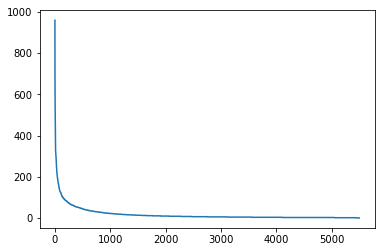

In [14]:
plt.show(plt.plot(sortedFreqVoca))

In [15]:
train=np.array(train)
train.shape

(800, 5500)

#1a)Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [16]:
import math
from collections import Counter
# x = the instance to be classified
# D = training data matrix
# C = Class of neighbor of training data 
# K is the number of neigbor
# measure is the method is used to calculation the similarity (0=Euclidean Dist, 0=Cosine)

def knn_classifier(x,D,c,K,measure):
    if measure == 0: 
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
        
        idx=np.argsort(dists)
        dists=sorted(dists)
        neighbor_class=c.ix[idx[:K]][1]
        predict_class=Counter(neighbor_class).most_common(1)

        return dists[:K],idx[:K],neighbor_class,predict_class[0][0]
    
    elif measure ==1:
        dot_pro = np.dot(D,x)
        x_norm = np.linalg.norm(x)
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])

        sims=dot_pro / (x_norm * D_norm)
        dists=1-sims
        
        idx=np.argsort(dists)
        dists=sorted(dists)
        neighbor_class=c.ix[idx[:K]][1]
        predict_class=Counter(neighbor_class).most_common(1)
    
        return dists[:K],idx[:K],neighbor_class,predict_class[0][0]
    else:
        #Return nothing if Input of Measure is NOT 0 or 1.
        print("Measure must be 0 or 1")
        return 

        
    
   

In [17]:
#Use one record of the test set of data as instance
instance=np.array(test.ix[0])
instance.shape

(5500,)

In [18]:
#Call the classifier function and save the output values to different variables with K=5 and Euclidean dist 
dists,idx,neighbor_class,predict_class=knn_classifier(instance,train,train_class,5,0)

In [19]:
#Top 5 closes distance
dists

[13.341664064126334,
 15.329709716755891,
 15.394804318340652,
 15.620499351813308,
 15.652475842498529]

In [20]:
#Top 5 closest neighbors index
idx

array([685, 628, 703, 266, 510])

In [21]:
#Top 5 neighbor Class from the training set
neighbor_class

685    1
628    1
703    1
266    1
510    1
Name: 1, dtype: int64

In [22]:
#Predicted Class for the instance
predict_class

1

#1b)Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.

In [23]:
def accuracy(train,train_class,test,test_class,K,measure):
    pre_class_array=np.array([])
    for i in range(test.shape[0]):
        instance=np.array(test.ix[i])
        dists,idx,neighbor_class,predict_class=knn_classifier(instance,train,train_class,K,measure)
        pre_class_array=np.append(pre_class_array,predict_class)
    
    if len(pre_class_array)==len(test_class):
        acc_count=0
        for i in range(len(pre_class_array)):
            if pre_class_array[i]==test_class.ix[i][1]:
                acc_count+=1
        percent_acc=acc_count/len(test_class)
    return pre_class_array,percent_acc

        

In [24]:
#Try to Run the Accuracy Function with K=5 and Measure=0 (Euclidean Distance)
predict_class, percent_acc = accuracy(train,train_class,test,test_class,5,0)
print("Accuracy is ", percent_acc*100,"%")

Accuracy is  81.5 %


In [25]:
#Try to Run the Accuracy Function with K=5 and Measure=1 (Cosine Distance)
predict_class, percent_acc = accuracy(train,train_class,test,test_class,5,1)
print("Accuracy is ", percent_acc*100,"%")

Accuracy is  97.0 %


#1c) Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

#Based on the following result, the cosine distance method seems more accurate than the Euclidean distance method in the case.

In [26]:
#Call the Accuracy function and run with K=1-21  and measure=0 (Euclidean Distance)
measure=0
percent_acc_array=np.array([])
percent_acc=0
for K in range(1,21):
    predict_class,percent_acc=accuracy(train,train_class,test,test_class,K,measure)
    percent_acc_array=np.append(percent_acc_array,percent_acc)

euc_acc=percent_acc_array

In [27]:
#Call the Accuracy function and run with K=1-21  and measure=1 (Cosine Distance)
measure=1
percent_acc_array=np.array([])
percent_acc=0
for K in range(1,21):
    predict_class,percent_acc=accuracy(train,train_class,test,test_class,K,measure)
    percent_acc_array=np.append(percent_acc_array,percent_acc)

cos_acc=percent_acc_array

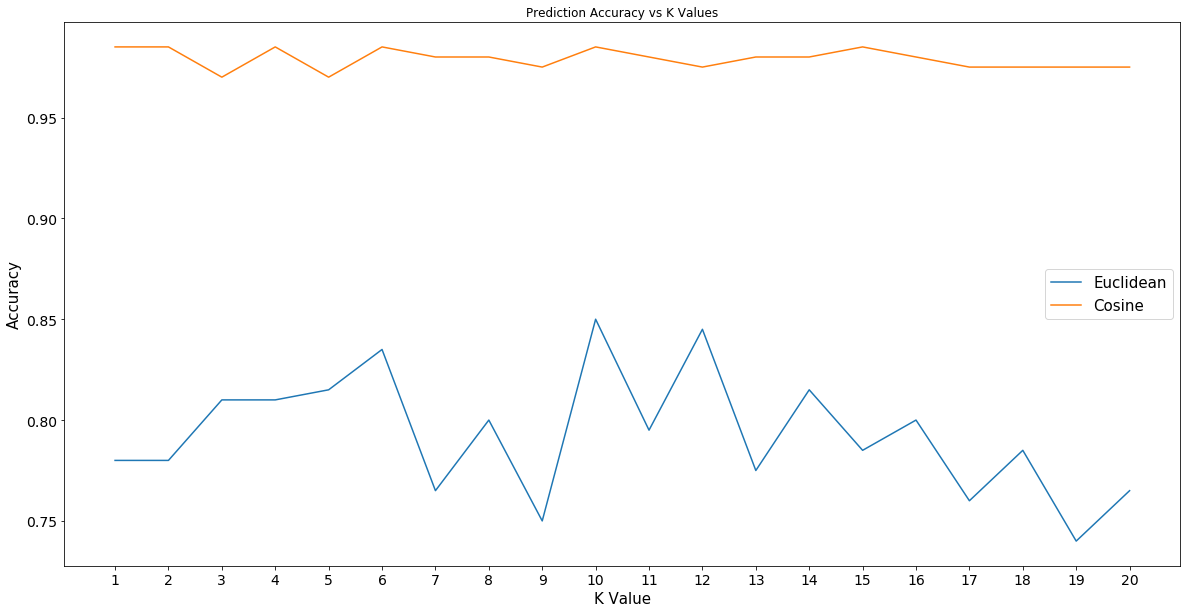

In [30]:
#Plot the accuracy of Euclidean Distance with the corresponding K
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('K Value',size=15)
ax1.set_ylabel('Accuracy',size=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.xaxis.set_ticks(np.arange(0, 21, 1))
ax1.set_title("Prediction Accuracy vs K Values")
plt.plot(range(1,1+len(euc_acc.tolist())), euc_acc, label='Euclidean')
plt.plot(range(1,1+len(cos_acc.tolist())), cos_acc, label='Cosine')
plt.legend(loc=7,fontsize=15)



#1d)Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [161]:
#Reload the dataset from local file
#train=pd.read_csv("./newsgroups/trainMatrixModified.txt",sep='\t',header=None)

In [31]:
#Total Number of Document
N_doc_train=train.shape[0]
print('Total Train Doc: ',N_doc_train)

Total Train Doc:  800


In [32]:
print(np.shape(train))
print(np.shape(test))

(800, 5500)
(200, 5500)


In [33]:
#Create a New Dataframe with the same size as the train data set
N_matrix_train=np.ones(np.shape(train),dtype=float)*N_doc_train
N_matrix_train.shape

(800, 5500)

In [34]:
#Total Number of Document contains every Vocabulary 
df_train=np.array([(train!=0).sum(0)])
df_train.shape

(1, 5500)

In [35]:
#Double check if there is 0 appear on df array
(df_train==0).sum() 

0

#There is ZERO on df array based on the above

In [36]:
#idf=log(N/nk)
idf_train=np.log2(np.divide(N_matrix_train,df_train))
idf_train.shape

(800, 5500)

In [37]:
#Calculate tf*idf for train data
tf_idf_train=train*idf_train
tf_idf_train.shape

(800, 5500)

In [38]:
#Reload the test dataset
#test=pd.read_csv("./newsgroups/testMatrixModified.txt",sep='\t',header=None)
test.shape

(200, 5500)

In [39]:
idf_train[0:200,:].shape

(200, 5500)

In [40]:
#Calculate tf*idf for test data
tf_idf_test=test*idf_train[0:200,:]
tf_idf_test.shape

(200, 5500)

In [41]:
tf_idf_train.shape

(800, 5500)

In [42]:
tf_idf_test.shape

(200, 5500)

In [43]:
tf_idf_train=np.array(tf_idf_train)

In [44]:
#Call the Accuracy function and run with K=1-21  and measure=0 (Euclidean Distance)
measure=0
percent_acc_array=np.array([])
percent_acc=0
for K in range(1,21):
    predict_class,percent_acc=accuracy(tf_idf_train,train_class,tf_idf_test,test_class,K,measure)
    percent_acc_array=np.append(percent_acc_array,percent_acc)

euc_tfidf_acc=percent_acc_array

In [45]:
#Call the Accuracy function and run with K=1-21  and measure=1 (Cosine Distance)
measure=1
percent_acc_array=np.array([])
percent_acc=0
for K in range(1,21):
    predict_class,percent_acc=accuracy(tf_idf_train,train_class,tf_idf_test,test_class,K,measure)
    percent_acc_array=np.append(percent_acc_array,percent_acc)

cos_tfidf_acc=percent_acc_array

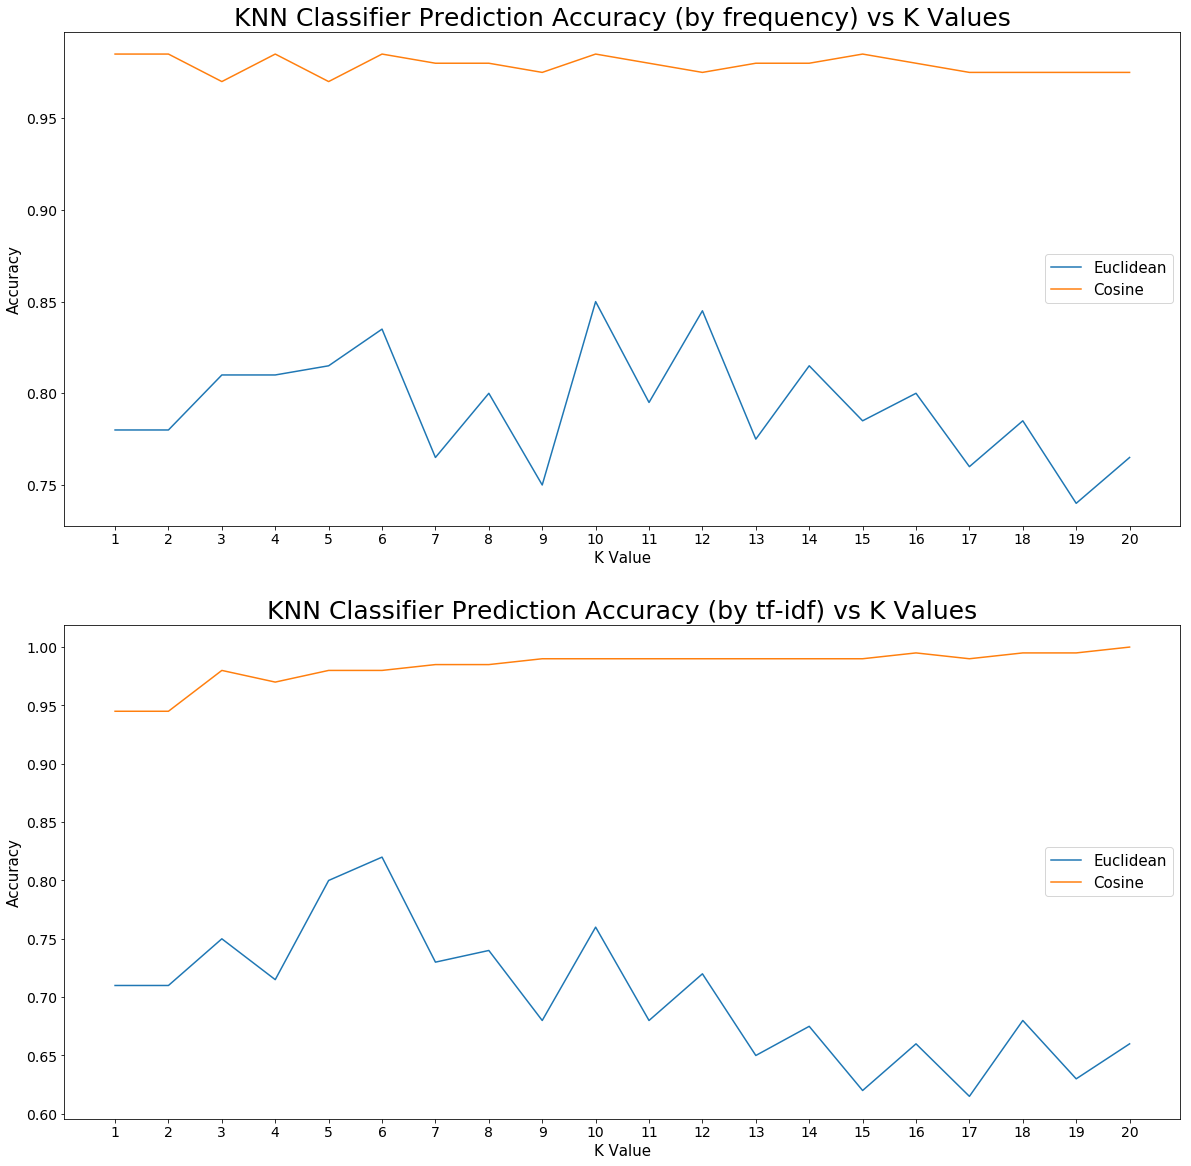

In [46]:
#Plot the accuracy of Euclidean Distance with the corresponding K
import matplotlib.ticker as ticker

euc=percent_acc_array

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('K Value',size=15)
ax1.set_ylabel('Accuracy',size=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.xaxis.set_ticks(np.arange(0, 21, 1))
ax1.set_title("KNN Classifier Prediction Accuracy (by frequency) vs K Values",size=25)
ax1.plot(range(1,1+len(euc_acc.tolist())), euc_acc, label='Euclidean')
ax1.plot(range(1,1+len(cos_acc.tolist())), cos_acc, label='Cosine')
plt.legend(loc=7,fontsize=15)

ax2 = fig.add_subplot(212)
ax2.set_xlabel('K Value',size=15)
ax2.set_ylabel('Accuracy',size=15)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.xaxis.set_ticks(np.arange(0, 21, 1))
ax2.set_title("KNN Classifier Prediction Accuracy (by tf-idf) vs K Values", size=25)
ax2.plot(range(1,1+len(euc_tfidf_acc.tolist())), euc_tfidf_acc, label='Euclidean')
ax2.plot(range(1,1+len(cos_tfidf_acc.tolist())), cos_tfidf_acc, label='Cosine')
plt.legend(loc=7,fontsize=15)



#As we seen the above resutlt, we could observe that the Cosine Similarity measure is generally more accurate than the Euclidean measure.  By using the raw data frequency (top graph), the Cosine similarity measure perform very consistent ranging between 0.97-0.995 accuracy as K values increase. When we look at the Cosine Measure on tf-idf graph, we could observe that the accuracy continues to improve as K values increasing. 

#Now, when we look at the Euclidean measure, the accuracy reaches 85% with K=10. Beyond that, the accuracy falls as the K increases. The accuracy appoach of Euclidean measure by using tf-idf is very similar to by using raw frequency data, the accuracy reaches about 83% with K=6, then the accuracy falls back down as K increases. The lowest accuracy of tf-idf is about 62% which is even worse than the accuracy 73% by using the raw frequency data. 

#The overall performance of the above two models, the Cosine similarity measure accoplish much more than the Euclidean Measure.

#1e)Create a classifier based on the Rocchio Method adapted for text categorization. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

#Based on the above analysis result, the accuracy of Rocchio Method Classification with tf-idf reaches 98%. The result is very close to the Cosine Similarity with tf-idf, but in this particular case, the Cosine Sinilarity with tf-idf comes out a little better on the accuracy which reaches 99.5%.

In [116]:
def Rocchio_prototype(train,train_class):
    tf_idf_train=()
    class_one_lst_sum=np.array([])
    #Total Number of Document
    N_doc_train=train.shape[1]
    #Create a New Dataframe with the same size as the train data set
    N_matrix_train=np.ones(np.shape(train),dtype=float)*N_doc_train
    #Total Number of Document contains every Vocabulary 
    df_train=np.array([(train!=0).sum(0)])
    #idf=log(N/nk)
    idf_train=np.log2(np.divide(N_matrix_train,df_train))
    #Calculate tf*idf for train data
    tf_idf_train=train*idf_train
    #Rotate the train sset direction
    tf_idf_train=tf_idf_train
    
    #Divide the train data set by Classes (0 or 1)
    class_lst=np.array(train_class.ix[:][1])
    class_one_lst=[]
    class_zero_lst=[]
    class_one_count=0
    class_zero_count=0
    for i in range(len(class_lst)):
        if class_lst[i] == 1:
            class_one_lst.append(tf_idf_train[i])
            class_one_count+=1
        else:
            class_zero_lst.append(tf_idf_train[i])
            class_zero_count+=1
    
    class_one_lst_sum=np.array(class_one_lst).sum(0)
    class_zero_lst_sum=np.array(class_zero_lst).sum(0)
    
    return class_one_lst_sum, class_zero_lst_sum
    #return tf_idf_train.shape, np.array(class_one_lst), np.array(class_zero_lst), tf_idf_train

In [140]:
def Rocchio_Classifier(class_one_lst_sum, class_zero_lst_sum, instance):
    class_one_norm = np.linalg.norm(class_one_lst_sum)
    class_zero_norm = np.linalg.norm(class_zero_lst_sum)
    instance_norm = np.linalg.norm(instance)
    
    dot_pro_one = np.dot(class_one_lst_sum,instance)
    dot_pro_zero = np.dot(class_zero_lst_sum,instance)
    
    cos_one = dot_pro_one / (class_one_norm * instance_norm)
    cos_zero = dot_pro_zero / (class_zero_norm * instance_norm)
    
    #Compare
    if cos_zero >= cos_one:
        return (0,float(cos_zero), float(cos_one))
    else:
        return (1,float(cos_zero), float(cos_one))

In [146]:
def accuracy(train,train_class, test, test_class):
#def accuracy(train,train_class,class_one_lst, class_zero_lst, tf_idf_train,test, test_class):
#def accuracy(train,train_class,test,test_class,K,measure):
    pre_class_array=np.array([])
    for i in range(test.shape[0]):
        instance=np.array(test.ix[i])
        class_one_lst_sum,class_zero_lst_sum=Rocchio_prototype(train,train_class)
        out_class,cos_zero,cos_one=Rocchio_Classifier(class_one_lst_sum, class_zero_lst_sum, instance)
        
        
        pre_class_array=np.append(pre_class_array,out_class)
    
    if len(pre_class_array)==len(test_class):
        acc_count=0
        for i in range(len(pre_class_array)):
            if pre_class_array[i]==test_class.ix[i][1]:
                acc_count+=1
        percent_acc=acc_count/len(test_class)
    return pre_class_array,percent_acc

In [150]:
pre_class_array,percent_acc=accuracy(train,train_class, test, test_class)

In [152]:
print("The Classification Accuracy of Rocchio Method is about ",percent_acc*100,"%" )

The Classification Accuracy of Rocchio Method is about  98.0 %


#2a.) Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [411]:
bank=pd.read_csv('./bank_data.csv',index_col=0)
bank.shape

(600, 11)

In [5]:
#Permutate the table before splitting into Training and Testing Set
#bank2=bank.reindex(np.random.permutation(bank.index))

In [412]:
bank_target=bank.pep
bank_target.shape

(600,)

In [413]:
#bank Table Attributes' Name
bank_names=bank.columns.values
bank_names

array(['age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'], dtype=object)

In [414]:
#Convert to standard spreadsheet for the Bank Table
bank_dummies=pd.get_dummies(bank[['age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage']])
bank_dummies.shape

(600, 19)

In [415]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
bank_train,bank_test,bank_target_train,bank_target_test=train_test_split(bank_dummies,
                                                                         bank_target,
                                                                         test_size=0.2,
                                                                         random_state=28)

In [416]:
print(bank_train.shape)
bank_train.head(5)

(480, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12689,58,49673.6,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0
ID12120,31,22522.8,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0
ID12499,64,57444.5,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
ID12658,41,25132.9,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0
ID12189,30,15848.7,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1


In [417]:
print(bank_target_train.shape)
bank_target_train.head(5)

(480,)


id
ID12689     NO
ID12120     NO
ID12499    YES
ID12658     NO
ID12189     NO
Name: pep, dtype: object

In [418]:
print(bank_test.shape)
bank_test.head(5)

(120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12566,57,28421.7,2,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
ID12329,37,28021.6,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1
ID12543,43,36281.0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0
ID12238,57,39205.3,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
ID12597,50,40972.9,2,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1


In [419]:
print(bank_target_test.shape)
bank_target_test.head(5)

(120,)


id
ID12566     NO
ID12329    YES
ID12543     NO
ID12238    YES
ID12597    YES
Name: pep, dtype: object

#2b) Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).

Based on the following result, the best K I would propose would be 7. The function runs the kNN classification from K=1 - 20. We could observe that the accuracy Score of the test set classification reaches 66.7% while the training set with 100% score. In terms of model simiplicity, this accuracy score with K=7 is the best among the rest. However, It still shows over-fitting (Low-Bias) for this Classifer for K=7 because the training accuracy is 100%, but the accuracy of test set data is still under 70%.


In [420]:
#Nornalizeing the Training and Testing dataset
np.set_printoptions(precision=2, linewidth=120, suppress=True)

min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)
bank_train_norm=min_max_scaler.transform(bank_train)
bank_test_norm=min_max_scaler.transform(bank_test)
print(bank_train_norm.shape)
print(bank_test_norm.shape)

(480, 19)
(120, 19)


In [421]:
#Check the Normalized train dataset
bank_train_norm[:5,:]

array([[ 0.82,  0.77,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ],
       [ 0.27,  0.3 ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ],
       [ 0.94,  0.9 ,  0.33,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ],
       [ 0.47,  0.35,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ],
       [ 0.24,  0.19,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  1.  ]])

In [422]:
#Check the Normalized test dataset
bank_test_norm[:5,:]

array([[ 0.8 ,  0.4 ,  0.67,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ],
       [ 0.39,  0.4 ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ],
       [ 0.51,  0.54,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ],
       [ 0.8 ,  0.59,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ],
       [ 0.65,  0.62,  0.67,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ]])

In [423]:
#We will us KNN classifier 
from sklearn import neighbors, tree, naive_bayes

In [426]:
#Set the neigbhors and run the KNN Classifier 
n_neighbors=7
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [427]:
#predict the test set data
knnpreds_test = knnclf.predict(bank_test_norm)

In [428]:
#Generate the Classification Report
#Generate the precision, recall, F1 score for each class
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.71      0.71      0.71        70
        YES       0.60      0.60      0.60        50

avg / total       0.67      0.67      0.67       120



In [429]:
#Generate confustion matrix 
#(true negatives is C_{0,0}, false negatives is C_{1,0}, 
# true positives is C_{1,1} and false positives is C_{0,1})
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print (knncm)

[[50 20]
 [20 30]]


In [430]:
#The average Accuracy score across the test instances
print (knnclf.score(bank_test_norm, bank_target_test))

0.666666666667


In [431]:
#The average accuracy score across the train instances to observe it is over-fit or under fit
print (knnclf.score(bank_train_norm, bank_target_train))


1.0


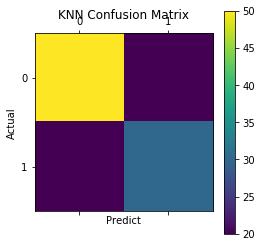

In [432]:
import matplotlib.pyplot as plt
%matplotlib inline
#Generate the plot for confusion matrix
plt.matshow(knncm)
plt.colorbar()
plt.title('KNN Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()

In [433]:
def knn_func(K,bank_train_norm,bank_target_train,bank_test_norm,bank_target_test):
    train_score_lst=[]
    test_score_lst=[]
    k_lst=[]
    for i in range(1,K+1):
        n_neighbors=i
        knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
        knnclf.fit(bank_train_norm, bank_target_train)
        k_lst.append(i)
        test_score_lst.append(knnclf.score(bank_test_norm, bank_target_test))
        train_score_lst.append(knnclf.score(bank_train_norm, bank_target_train))
        
    score_df=pd.DataFrame({'train_score':train_score_lst,'test_score':test_score_lst,"K":k_lst})
    score_df.plot(x='K',figsize=(10,5))
    plt.title('Training and Testing Score')
    plt.xlabel('K')
    plt.ylabel('Score')
    plt.xlim([0,20])
    plt.show()
    return

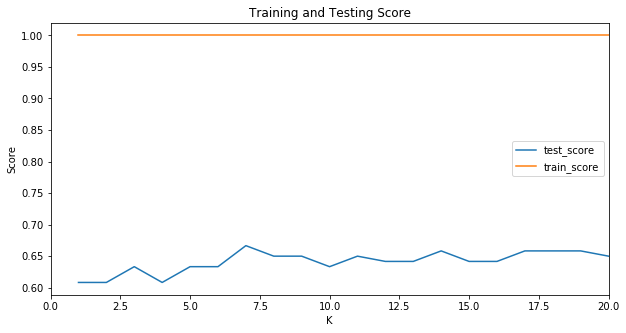

In [434]:
knn_func(20,bank_train_norm,bank_target_train,bank_test_norm,bank_target_test)

#2c) Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?


#Decision Tree Classifier (Using the Default Parameters)

#Based on the following classfication score result, the overall accuracy score is not very high which is 70.8% on train data and 70% on test data. Although the accuracy scores are NOT very high, the scores among the test and train are very close, this implies that this model does NOT show any over-fitting / under-fitting and Variance tradeoff. However, I would suggest further analysis on the model parameters to search the optimal accuracy point (Balance of tradeoff) of the train and test data.

In [435]:
#Set up Decision Tree classifier
treeclf = tree.DecisionTreeClassifier()

In [436]:
#Plug in the train dataset with target class
treeclf = treeclf.fit(bank_train, bank_target_train)

In [437]:
#Classify the Target Class
treepreds_test = treeclf.predict(bank_test_norm)
print (treepreds_test)

['NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO']


In [438]:
#Generate the Classification Report
#Generate the precision, recall, F1 score for each class
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.67      0.96      0.79        70
        YES       0.85      0.34      0.49        50

avg / total       0.74      0.70      0.66       120



In [439]:
#Generate confustion matrix 
#(true negatives is C_{0,0}, false negatives is C_{1,0}, 
# true positives is C_{1,1} and false positives is C_{0,1})
from sklearn.metrics import confusion_matrix
treecm = confusion_matrix(bank_target_test, treepreds_test)
print (treecm)

[[67  3]
 [33 17]]


In [440]:
#The average Accuracy score across the test instances
print (treeclf.score(bank_test_norm, bank_target_test))

0.7


In [441]:
#The average Accuracy score across the test instances
print (treeclf.score(bank_train_norm, bank_target_train))

0.708333333333


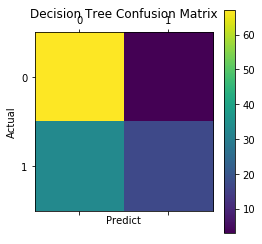

In [442]:
import matplotlib.pyplot as plt
%matplotlib inline
#Generate the plot for confusion matrix
plt.matshow(treecm)
plt.colorbar()
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()

#Navie Bayes (Gaussian) Classifier (Using the Default Parameters)

#Based on the following Navie Bayes classfication score result, the overall accuracy scores are not very high which is 67.3% on train data and 63.3% on test data. Although the accuracy scores are NOT very high, the scores among the test and train are still align, this implies that this model does NOT show any over-fitting / under-fitting and Variance tradeoff. However, I would suggest further adjust on the model parameter to search the optimal accuracy (Balance of tradeoff) of the train and test data.

In [445]:
nbclf = naive_bayes.GaussianNB()
nbclf=nbclf.fit(bank_train_norm,bank_target_train)

In [446]:
nbcpreds=nbclf.predict(bank_test_norm)
print(nbcpreds)

['NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES']


In [447]:
#Generate Classification Report
from  sklearn.metrics import classification_report
print(classification_report(bank_target_test,nbcpreds))

             precision    recall  f1-score   support

         NO       0.68      0.71      0.69        70
        YES       0.57      0.52      0.54        50

avg / total       0.63      0.63      0.63       120



In [448]:
#Generate Confustion Matrix
from sklearn.metrics import confusion_matrix
nbccm=confusion_matrix(bank_target_test,nbcpreds)
print(nbccm)

[[50 20]
 [24 26]]


In [449]:
#The average Accuracy score across the test instances
nbclf.score(bank_test_norm,bank_target_test)

0.6333333333333333

In [450]:
#The average Accuracy score across the train instances
nbclf.score(bank_train_norm, bank_target_train)

0.67291666666666672

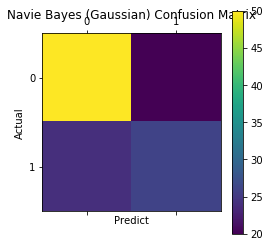

In [451]:
import matplotlib.pyplot as plt
%matplotlib inline
#Generate the plot for confusion matrix
plt.matshow(nbccm)
plt.colorbar()
plt.title('Navie Bayes (Gaussian) Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.figsize=(1000,1000)

plt.show()

#2d) Discuss your observations based on the above experiments.

#According to above 3 classifers(KNN, Decision Tree, Naive Bayes), the result are very close. They accuracy score are ranged between 0.65-0.71. The best model for testing set data was by Decision Tree model, the accuracy sorce is about 70%. This model does NOT show a very high accuracy score, but it is NOT under-fitting / over-fitting or Variance tradeoff. So that I would propose the Tree classifier is the best model within the initial classification analysis. 

#For the KNN model, I would say that the current model is overfitting because the difference accuracy score between the train and test set are over 30%. The more complex model shows the higher variance(Low Bias). In this case, I would propose to use more training instances to train the model or make the model even simplier (Less feature) in order to solve the overfitting problem

#For the Naive Bayes model, the accuracy score are very close between the train (67.3) and test data set(63.3). In this case, it is hard to say whether the model is acceptable or not. I would suggest that the further test or adjust parameters on the model is needed to determine if the model is accessible for the further analysis.

#3a)Preprocessing and data analysis:
#Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
actable=pd.read_csv('./adult-modified.csv',na_values=['?'])
actable.shape

(10000, 8)

In [3]:
actable.head(5)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [4]:
actable.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [5]:
#Remove instance if workclass values is missing
actable.drop(actable[actable.workclass.isnull()].index,axis=0, inplace=True)
actable.shape

(9412, 8)

In [6]:
#Remove instance if marital-status values is missing
actable.drop(actable[actable['marital-status'].isnull()].index,axis=0,inplace=True)
actable.shape

(9412, 8)

In [7]:
#Remove instance if race values is missing
actable.drop(actable[actable.race.isnull()].index,axis=0, inplace=True)
actable.shape

(9412, 8)

In [8]:
#Remove instance if sex values is missing
actable.drop(actable[actable.sex.isnull()].index,axis=0,inplace=True)
actable.shape

(9412, 8)

In [9]:
#Fill in  absolute value with mean values
actable.age.fillna(actable.age.mean(),axis=0,inplace=True)
actable.education.fillna(actable.education.mean(),axis=0,inplace=True)
actable['hours-per-week'].fillna(actable['hours-per-week'].mean(),axis=0,inplace=True)

In [10]:
#Recheck the size of the table
actable.shape

(9412, 8)

#3a) Preprocessing and data analysis:
#Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

In [11]:
actable.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.364632,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962034,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


In [12]:
actable.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

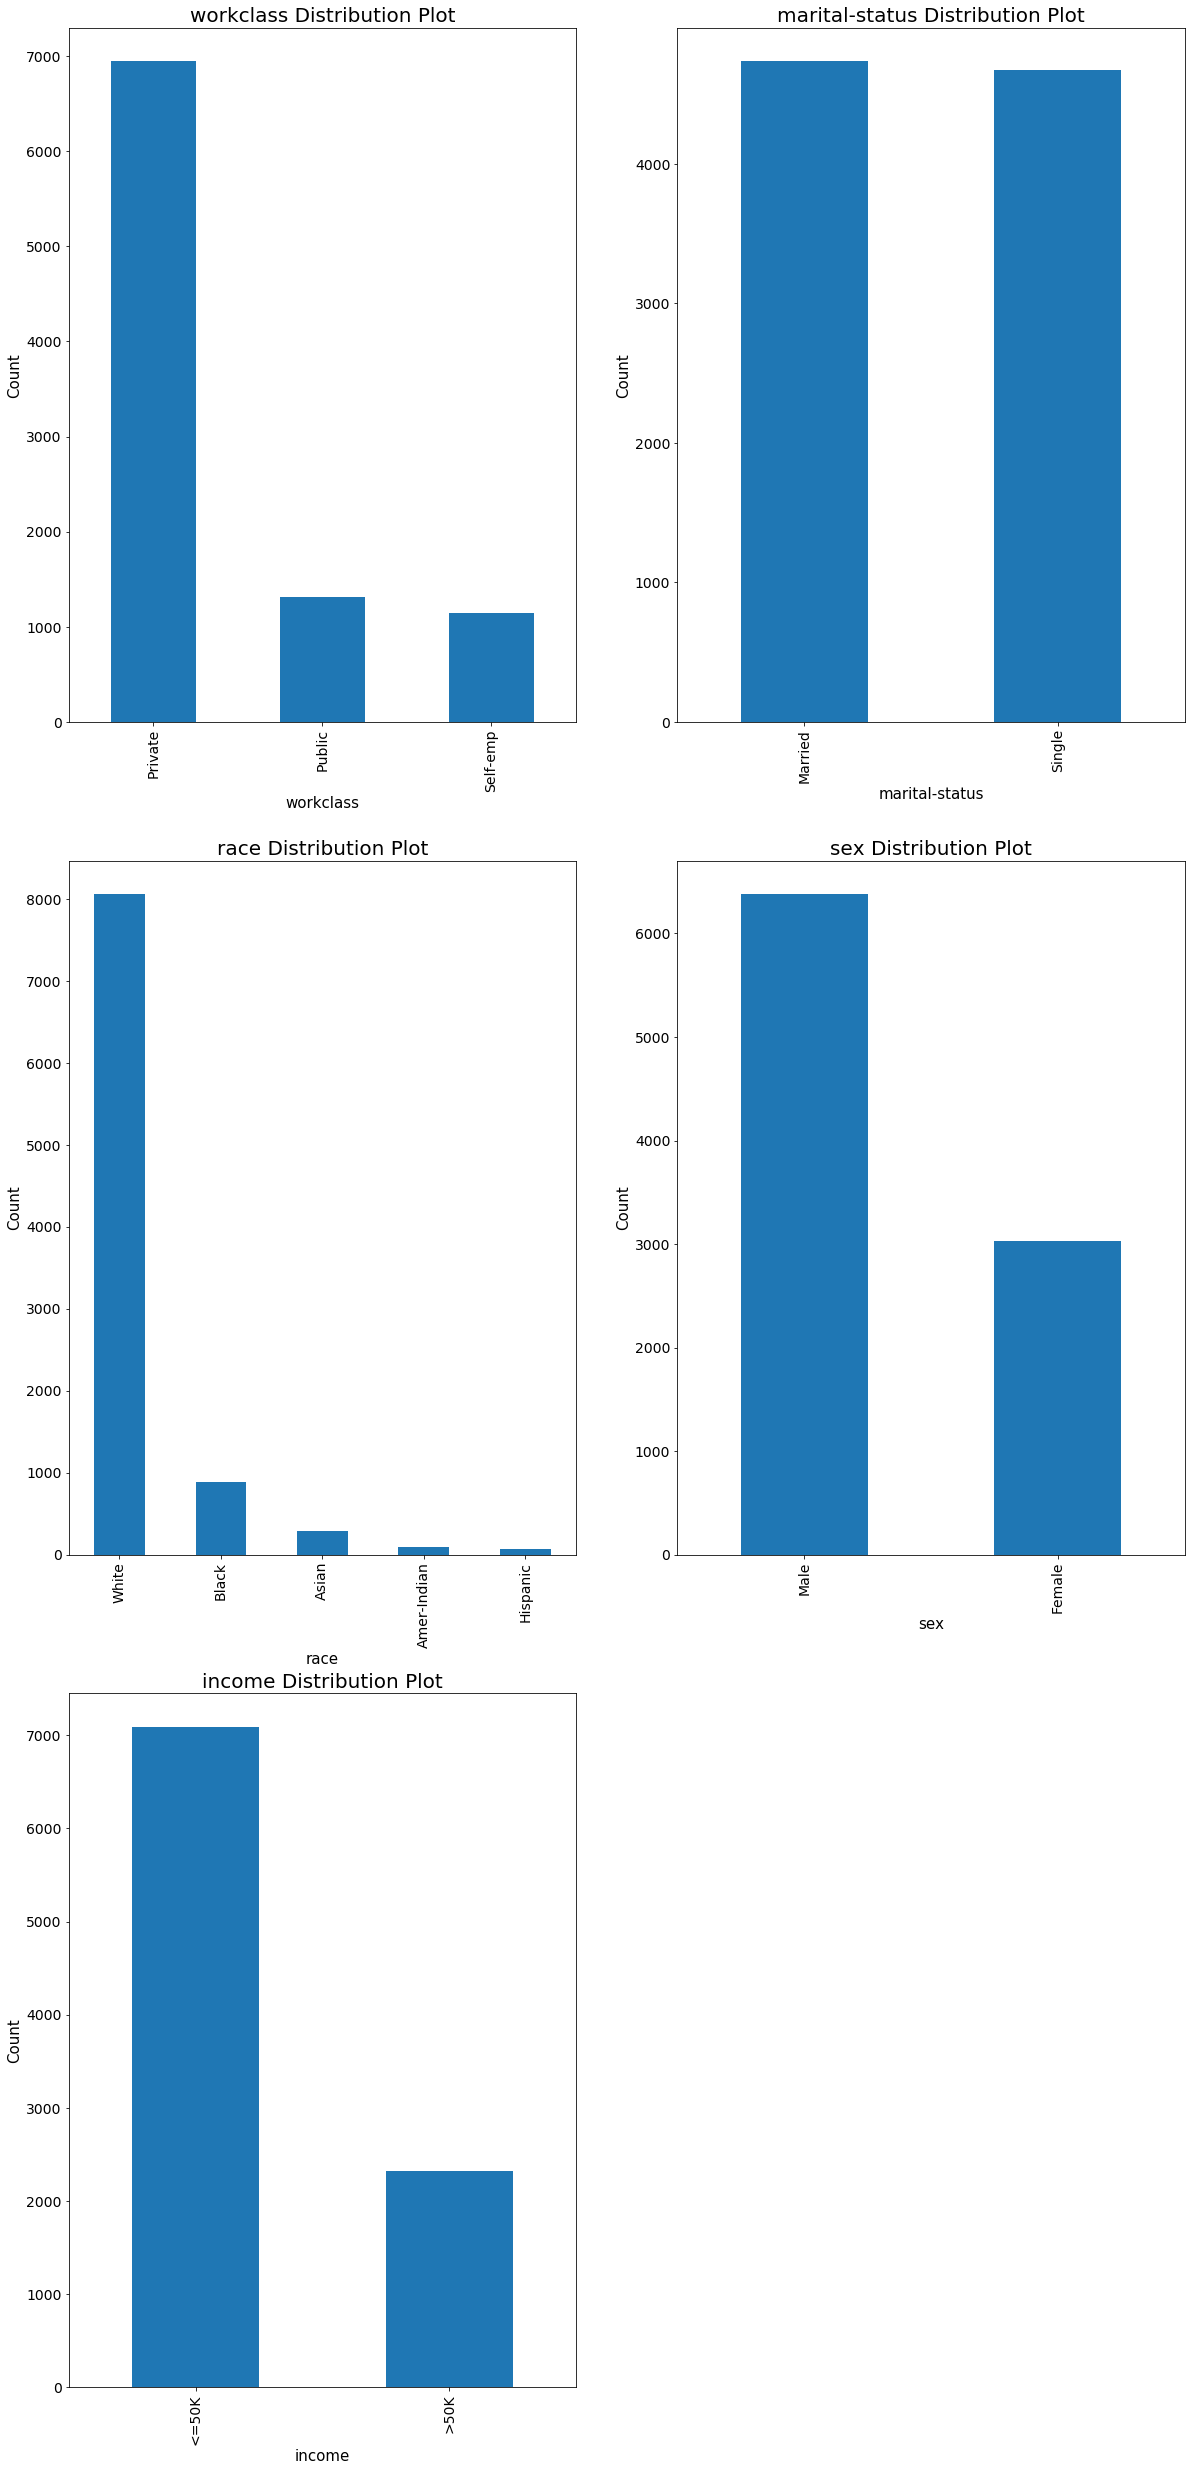

In [13]:
#Explore the character of Categorical features 

fig = plt.figure(figsize=(20, 120))

ax1 = fig.add_subplot(8,2,1) # one row, two column, first plot
actable['workclass'].value_counts().plot(kind='bar')
ax1.set_title("workclass Distribution Plot", size=20)
ax1.set_xlabel("workclass", size=15)
ax1.set_ylabel("Count", size=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)


ax2 = fig.add_subplot(8,2,2) # one row, two column, second plot
actable['marital-status'].value_counts().plot(kind='bar')
ax2.set_title("marital-status Distribution Plot", size=20)
ax2.set_xlabel("marital-status", size=15)
ax2.set_ylabel("Count", size=15)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

ax3 = fig.add_subplot(8,2,3) # one row, two column, third plot
actable['race'].value_counts().plot(kind='bar')
ax3.set_title("race Distribution Plot", size=20)
ax3.set_xlabel("race", size=15)
ax3.set_ylabel("Count", size=15)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)

ax4 = fig.add_subplot(8,2,4) # one row, two column, fourth plot
actable['sex'].value_counts().plot(kind='bar')
ax4.set_title("sex Distribution Plot", size=20)
ax4.set_xlabel("sex", size=15)
ax4.set_ylabel("Count", size=15)
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)

ax5 = fig.add_subplot(8,2,5) # one row, two column, fifth plot
actable['income'].value_counts().plot(kind='bar')
ax5.set_title("income Distribution Plot", size=20)
ax5.set_xlabel("income", size=15)
ax5.set_ylabel("Count", size=15)
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)

In [14]:
#Showing the workclass feature against all the numeric attributes
actable.groupby('workclass').describe()

age    education  hours-per-week
workclass                                                
Private   count  6947.000000  6947.000000     6947.000000
          mean     36.796739     9.890600       40.388225
          std      12.749788     2.477740       11.172276
          min      17.000000     1.000000        2.000000
          25%      26.000000     9.000000       40.000000
          50%      35.000000    10.000000       40.000000
          75%      45.000000    11.000000       45.000000
          max      90.000000    16.000000       99.000000
Public    count  1317.000000  1317.000000     1317.000000
          mean     40.944802    11.098709       40.449506
          std      11.898005     2.471289       10.227722
          min      17.000000     1.000000        1.000000
          25%      32.000000     9.000000       40.000000
          50%      41.000000    10.000000       40.000000
          75%      49.000000    13.000000       40.000000
          max      90.000000    16.000000       97.000000
Self-emp  count  1148.000000  1148.000000     1148.000000
          mean     44.892568    10.428571       45.991289
          std      12.904270     2.706372       15.983970
          min      17.000000     2.000000        1.000000
          25%      36.000000     9.000000       40.000000
          50%      44.000000    10.000000       45.000000
          75%      54.000000    13.000000       55.000000
          max      90.000000    16.000000       99.000000

In [15]:
#Showing the marital-status feature against all the numeric attributes
actable.groupby('marital-status').describe()

age    education  hours-per-week
marital-status                                                
Married        count  4737.000000  4737.000000     4737.000000
               mean     43.273440    10.253114       43.251847
               std      11.983307     2.720958       11.843437
               min      17.000000     1.000000        1.000000
               25%      34.000000     9.000000       40.000000
               50%      42.000000    10.000000       40.000000
               75%      51.000000    13.000000       50.000000
               max      90.000000    16.000000       99.000000
Single         count  4675.000000  4675.000000     4675.000000
               mean     33.390723     9.995722       38.879786
               std      11.984262     2.340227       11.516973
               min      17.000000     1.000000        2.000000
               25%      24.000000     9.000000       35.000000
               50%      31.000000    10.000000       40.000000
               75%      41.000000    11.000000       40.000000
               max      90.000000    16.000000       99.000000

In [16]:
#Showing the race feature against all the numeric attributes
actable.groupby('race').describe()

age    education  hours-per-week
race                                                       
Amer-Indian count    92.000000    92.000000       92.000000
            mean     36.946673     9.119565       41.434783
            std      11.232960     2.026432       12.276400
            min      17.000000     4.000000        8.000000
            25%      28.000000     9.000000       40.000000
            50%      36.500000     9.000000       40.000000
            75%      44.000000    10.000000       45.000000
            max      67.000000    13.000000       84.000000
Asian       count   291.000000   291.000000      291.000000
            mean     37.777278    10.941581       41.116838
            std      12.688491     2.712682       11.820792
            min      17.000000     2.000000        8.000000
            25%      28.000000     9.000000       40.000000
            50%      37.000000    10.000000       40.000000
            75%      45.000000    13.000000       40.000000
            max      90.000000    16.000000       99.000000
Black       count   892.000000   892.000000      892.000000
            mean     38.017039     9.582960       38.456278
            std      12.418760     2.226476       10.199431
            min      17.000000     1.000000        2.000000
            25%      28.000000     9.000000       37.750000
            50%      37.000000     9.000000       40.000000
            75%      47.000000    10.000000       40.000000
            max      90.000000    16.000000       99.000000
Hispanic    count    75.000000    75.000000       75.000000
            mean     33.738195     8.853333       42.666667
            std      10.458353     3.069877        9.124267
            min      18.000000     2.000000       20.000000
            25%      26.000000     7.000000       40.000000
            50%      31.000000     9.000000       40.000000
            75%      41.000000    10.000000       45.500000
            max      65.000000    15.000000       84.000000
White       count  8062.000000  8062.000000     8062.000000
            mean     38.483512    10.179112       41.350409
            std      13.062263     2.552060       12.043552
            min      17.000000     1.000000        1.000000
            25%      28.000000     9.000000       40.000000
            50%      37.000000    10.000000       40.000000
            75%      47.000000    13.000000       45.000000
            max      90.000000    16.000000       99.000000

In [17]:
#Showing the sex feature against all the numeric attributes
actable.groupby('sex').describe()

age    education  hours-per-week
sex                                                   
Female count  3029.000000  3029.000000     3029.000000
       mean     37.012171    10.095081       37.257511
       std      13.352487     2.302332       11.086026
       min      17.000000     1.000000        2.000000
       25%      26.000000     9.000000       35.000000
       50%      36.000000    10.000000       40.000000
       75%      46.000000    12.000000       40.000000
       max      90.000000    16.000000       99.000000
Male   count  6383.000000  6383.000000     6383.000000
       mean     39.006431    10.139590       42.894250
       std      12.723429     2.648374       11.821253
       min      17.000000     1.000000        1.000000
       25%      29.000000     9.000000       40.000000
       50%      38.000000    10.000000       40.000000
       75%      47.000000    13.000000       50.000000
       max      90.000000    16.000000       99.000000

In [18]:
#Showing the income feature against all the numeric attributes
actable.groupby('income').describe()

age    education  hours-per-week
income                                                
<=50K  count  7093.000000  7093.000000     7093.000000
       mean     36.642971     9.646976       39.567038
       std      13.339926     2.397358       11.868506
       min      17.000000     1.000000        1.000000
       25%      26.000000     9.000000       38.000000
       50%      35.000000     9.000000       40.000000
       75%      45.000000    10.000000       40.000000
       max      90.000000    16.000000       99.000000
>50K   count  2319.000000  2319.000000     2319.000000
       mean     43.630585    11.588185       45.708495
       std      10.043148     2.410764       10.678794
       min      19.000000     2.000000        1.000000
       25%      36.000000     9.000000       40.000000
       50%      43.000000    12.000000       40.000000
       75%      50.000000    13.000000       50.000000
       max      90.000000    16.000000       99.000000

In [19]:
actable.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

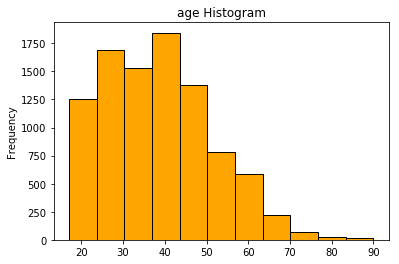

In [20]:
#Histogram of age attribute
actable.age.plot(kind='hist',bins=11,title='age Histogram',color='orange', edgecolor='black')
plt.show()

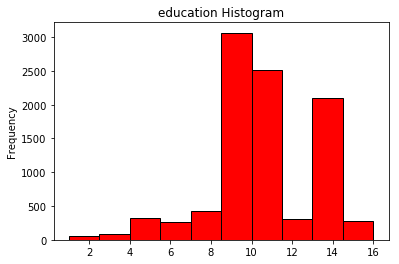

In [21]:
#Histogram of education attribute
actable.education.plot(kind='hist',bins=10,title='education Histogram',color='red', edgecolor='black')
plt.show()

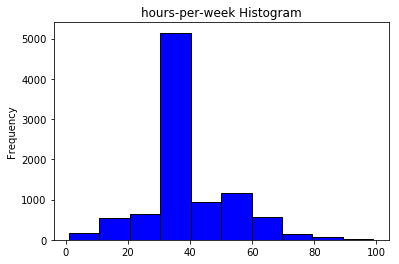

In [22]:
#Histogram of hours-per-week attribute
actable['hours-per-week'].plot(kind='hist',bins=10,title='hours-per-week Histogram',color='blue', edgecolor='black')
plt.show()

#3a) Preprocessing and data analysis:

Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

#According to the following analysis between education and race, we could observe that the White race donminate on all level of education levels, especially on grade 9,10 and 13.I would think that the reason behind this might be related to population. Further research might be needed to find out the true reason.

#For the analysis between workclass and income, we could observe that Low income (<=50k) dominate all the workclass. The majority of low income counts in the Private Section. I would believe that the true reason behind this would be very complicated because this might related to geographical, industris among workclass, age of workforce etc. So that I also think that further research is needed for finding out the reason.

#For the analysis between race and workclass, the result shows very similar pattern as the previous analysis(education and race), the White race dominates among all workclass. As I mentioned, further research is needed to investgate to find out the reason behind that, I would guess that might related to the factors of population, geographical, cultura etc.

#For the final observation between race and income, the result is very typical which the lower income (<=50k) category dominate among all the race, this stats is reasonable because I would think that this income pattern exist in a lot of countries. Lower income population is basically the working force for a country has to be majority of the population. Similar to the above findings, the count of the white race dominate the lower income category. However, the largest contrast between the Low and High income group is the Hispanic group which is 92(Low):8(High), the second big contrast group is Amer-Indian 91(Low):9(High). Other than that, the rest of race group proportion is very similar.  

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101


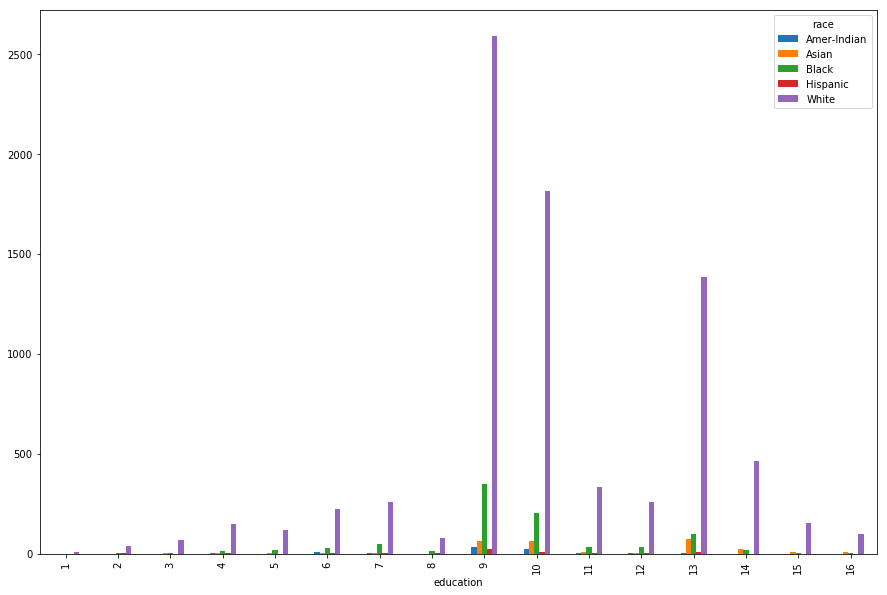

In [23]:
#Cross Tabulations between education and race attributes
ct_ed_ra=pd.crosstab(actable.education,actable.race)
print(ct_ed_ra)
ct_ed_ra.plot(kind='bar',figsize=(15,10))
plt.show()

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423


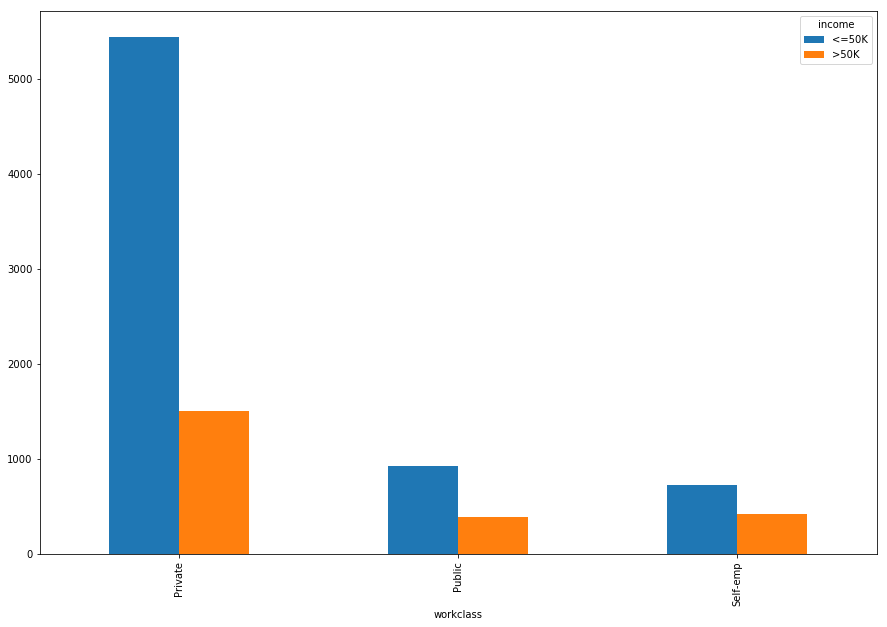

In [24]:
ct_wc_in=pd.crosstab(actable.workclass,actable.income)
print(ct_wc_in)
ct_wc_in.plot(kind='bar',figsize=(15,10))
plt.show()

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060


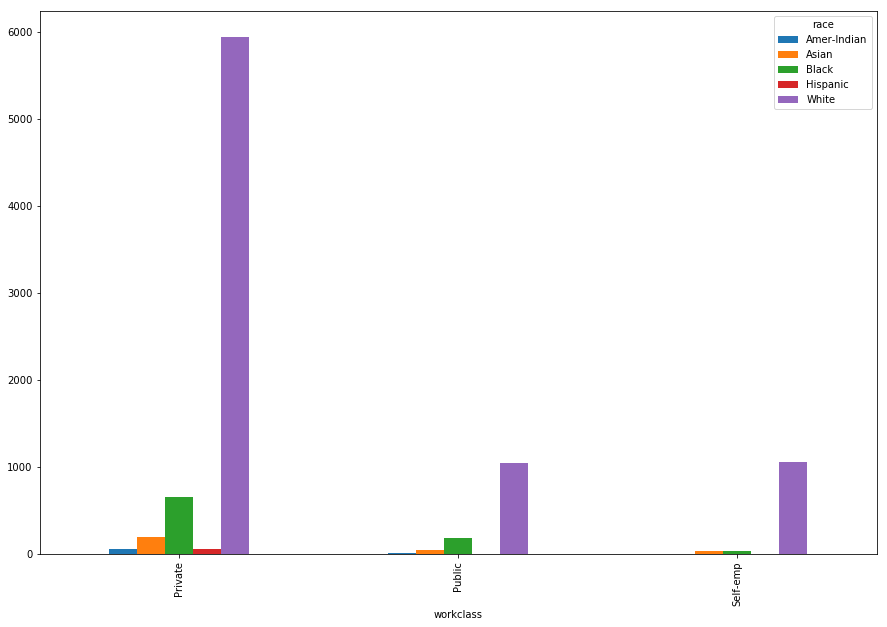

In [25]:
ct_wc_ra=pd.crosstab(actable.workclass,actable.race)
print(ct_wc_ra)
ct_wc_ra.plot(kind='bar',figsize=(15,10))
plt.show()

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118


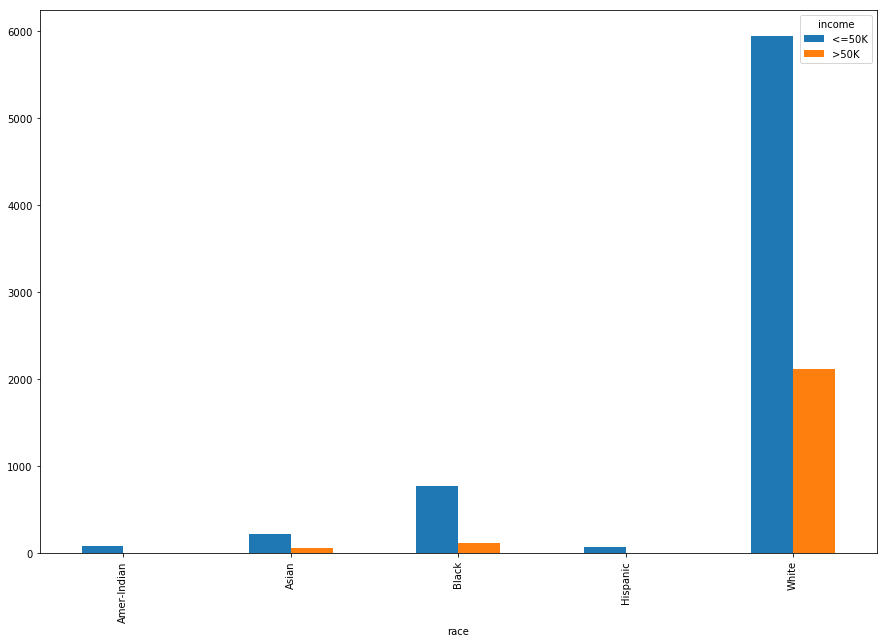

In [26]:
ct_ra_in=pd.crosstab(actable.race,actable.income)
print(ct_ra_in)
ct_ra_in.plot(kind='bar',figsize=(15,10))
plt.show()

In [27]:
t1=actable.groupby(['race','income'])['income'].count().groupby(level='race').apply(lambda x: 100*x/float(x.sum()))
print(t1)

race         income
Amer-Indian  <=50K     90.217391
             >50K       9.782609
Asian        <=50K     76.975945
             >50K      23.024055
Black        <=50K     86.659193
             >50K      13.340807
Hispanic     <=50K     92.000000
             >50K       8.000000
White        <=50K     73.728603
             >50K      26.271397
Name: income, dtype: float64


#3 Preprocessing and data analysis:

#Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118


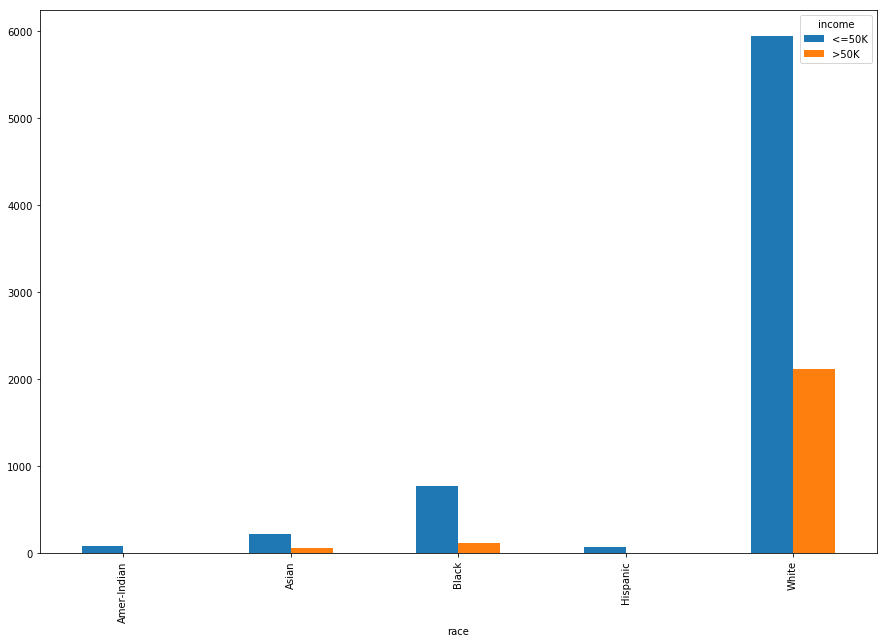

In [28]:
ct_ra_in=pd.crosstab(actable.race,actable.income)
print(ct_ra_in)
ct_ra_in.plot(kind='bar',figsize=(15,10))
plt.show()

#For the observation from last part, between race and income, the result is very typical which the lower income (<=50k) category dominate among all the race, this stats is reasonable because I would think that this income pattern exist in a lot of countries. Lower income population is basically the working force for a country has to be majority of the population. Similar to the above findings, the count of the white race dominate the lower income category. However, the largest contrast between the Low and High income group is the Hispanic group which is 92(Low):8(High), the second big contrast group is Amer-Indian 91(Low):9(High). Other than that, the rest of race group proportion is very similar.

income   <=50K  >50K
age                 
young     2988   237
mid-age   2119   981
old       1986  1101


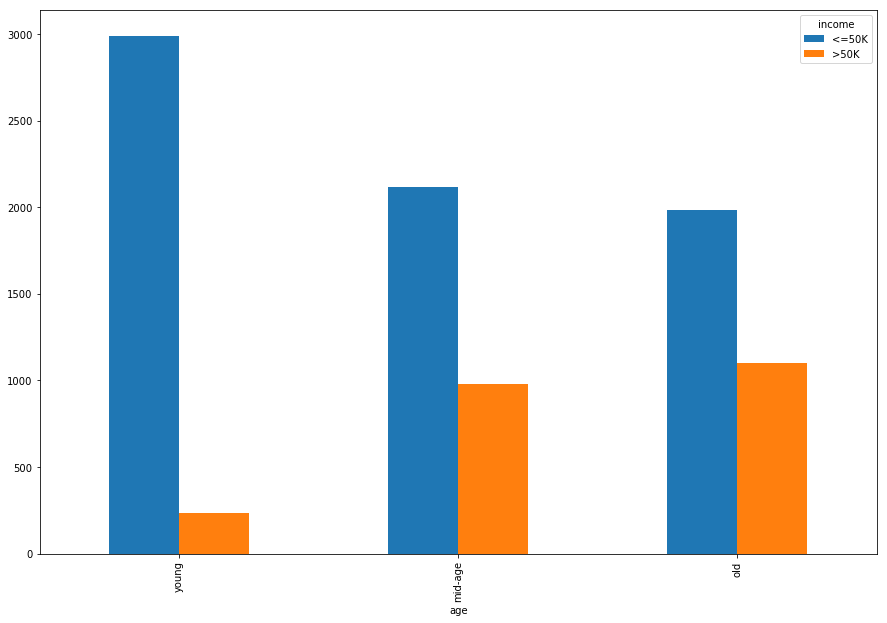

In [29]:
#Categorized the age group 
age_cat=actable.age
age_cat=pd.qcut(age_cat,[0,0.33,0.66,1],['young','mid-age','old'])
#Age vs income
ct_ag_in=pd.crosstab(age_cat,actable.income)
print(ct_ag_in)
ct_ag_in.plot(kind='bar',figsize=(15,10))
plt.show()

#For the above analysis between age and income, the age group was first categorized to 2 groups (young, mid-age, old). we could observe that the low income group (<=50k) dominates all the age group. Especially the most contrast happened in the young age group. I would say that this finding is reasonable because the income shoud correlate to the working experience and skill set. So that young age group should have a large portion of low income group. 

income     <=50K  >50K
education             
Low         3619   599
Mid         1737   388
Advanced    1737  1332


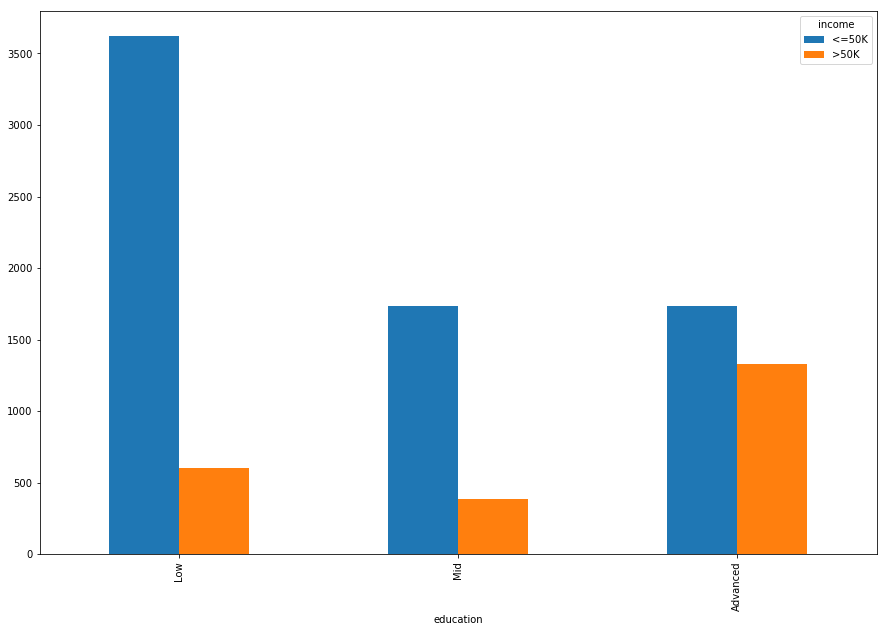

In [30]:
#Categorized the education group
ed_cat=actable.education
ed_cat=pd.qcut(ed_cat,[0,0.33,0.66,1],['Low','Mid','Advanced'])
#Education vs income
ct_ed_in=pd.crosstab(ed_cat,actable.income)
print(ct_ed_in)
ct_ed_in.plot(kind='bar',figsize=(15,10))
plt.show()

For the analysis between education and income,the education feature is first categroized into 3 groups (Low, Mid, Advanced). We could obsviously obseve that the low income group dominate among all the education groups. The biggest contrast between low and high income is the low-educated group. The low income group is about 6 times more than the high income group, The second big contrast group is the mid-educated group. The least contrast is the Advanced-educated group. This finding is very reasonable,I believe this circumstance really happening in majority of cities / countries, the higher education level group is more capable to get a higher income. However, the low-income group always exist no matter what because I believe low-inocme is the main working class in the country.

income          <=50K  >50K
hours-per-week             
Part-Time        6416  1872
Full-Time         677   447


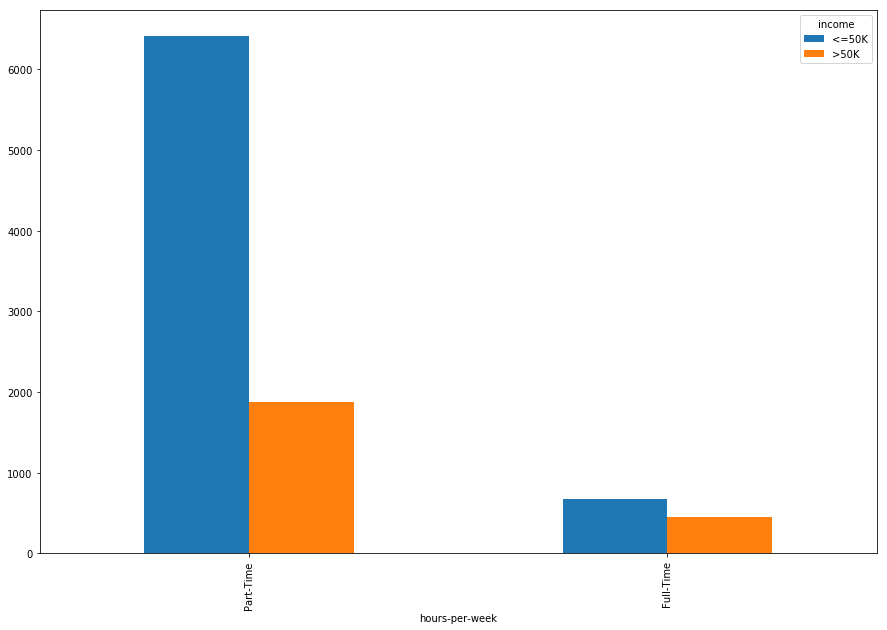

In [31]:
#Categorized the education group
hr_cat=actable['hours-per-week']
hr_cat=pd.qcut(hr_cat,[0,0.8,1],['Part-Time','Full-Time'])
#Education vs income
ct_hr_in=pd.crosstab(hr_cat,actable.income)
print(ct_hr_in)
ct_hr_in.plot(kind='bar',figsize=(15,10))
plt.show()

#For the above analysis between hours-per-week and income, the hous-per-week attribute is first categorized into 2 level (Part-time , Full-time). The full-time does not means working hours is 40, but it just mean working hours is at the highest quartile of the hours-per-week group. As we can see, the low-income group dominate both part-time and full-time category, especially on the part-time category, the finding is very usual, working less than 40 hours a week mostly get lower pay, but certainly it depends on the type of job and location of work. More research is needed to explore the reasons. 

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423


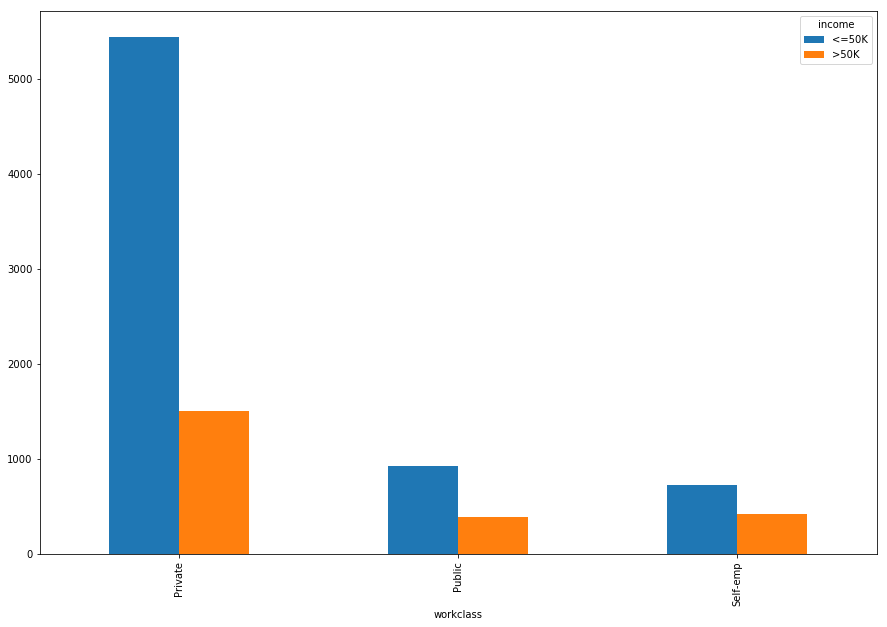

In [32]:
#Education vs income
ct_wc_in=pd.crosstab(actable.workclass,actable.income)
print(ct_wc_in)
ct_wc_in.plot(kind='bar',figsize=(15,10))
plt.show()

#From the analysis from the previous part between workclass and income, we could observe that Low income (<=50k) dominate all the workclass. The majority of low income counts in the Private Section. I would guess that one reason would be private sector provide the most jobs placements in the communities, so that the working group appears on the prviate sector. Also, I would believe that the true reason behind this would be very complicated because this might related to geographical, industris among workclass, age of workforce etc. So that I also think that further research is needed for finding out the reason. 

income          <=50K  >50K
marital-status             
Married          2730  2007
Single           4363   312


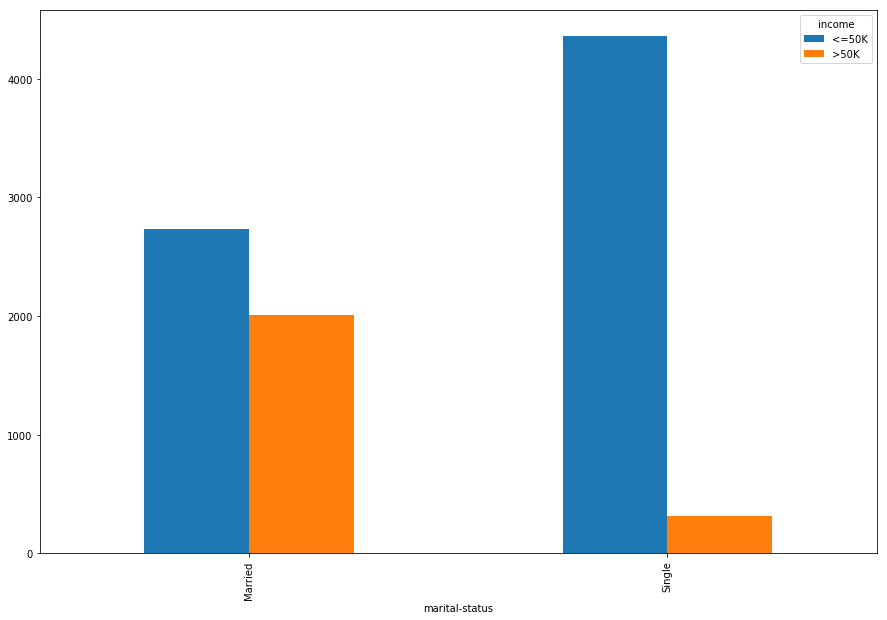

In [33]:
#marital-status vs income
ct_ms_in=pd.crosstab(actable['marital-status'],actable.income)
print(ct_ms_in)
ct_ms_in.plot(kind='bar',figsize=(15,10))
plt.show()

#The above data shows some very interesting result, the Single group shows much bigger contrast than the Married group. The Low-income group at least 13 times more more than the high-income group. On the contrary, both income group shows very similar within the Married group. Also, the high-income group from Married is about 6 times more than the single group. This finding is very interesting, it is very difficult to say the reason behind this. It would be some factors e.g. working attitude or education related to this. Definitely further research is necessary to prove this findings. 

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118


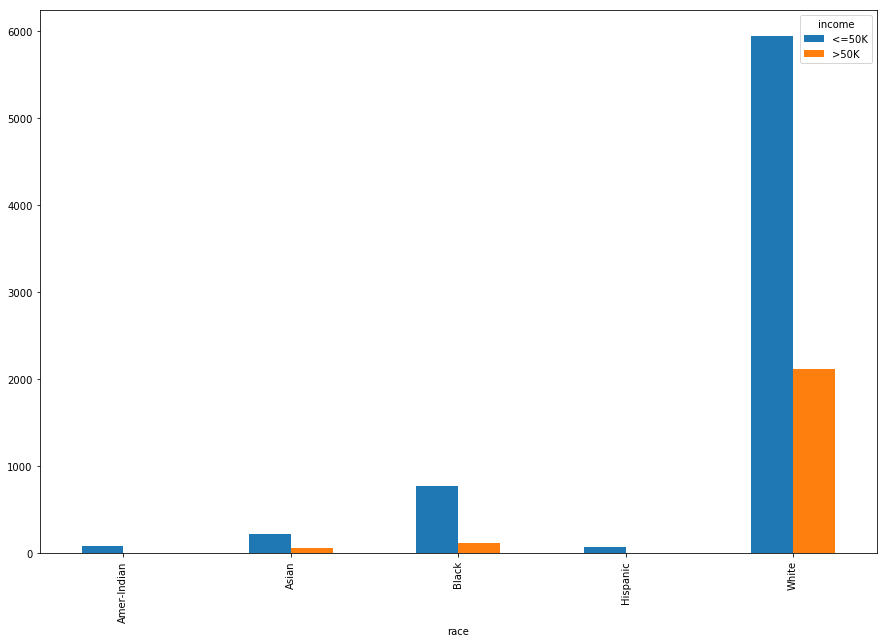

In [34]:
#race vs income
ct_ra_in=pd.crosstab(actable.race,actable.income)
print(ct_ra_in)
ct_ra_in.plot(kind='bar',figsize=(15,10))
plt.show()

#From the previous observation between race and income, the result is very typical which the lower income (<=50k) category dominate among all the race, this stats is reasonable because I would think that this income pattern exist in a lot of countries. Lower income population is basically the working force for a country has to be majority of the population. Similar to the above findings, the count of the white race dominate the lower income category. However, the largest contrast between the Low and High income group is the Hispanic group which is 92(Low):8(High), the second big contrast group is Amer-Indian 91(Low):9(High). Other than that, the rest of race group proportion is very similar.

income  <=50K  >50K
sex                
Female   2669   360
Male     4424  1959


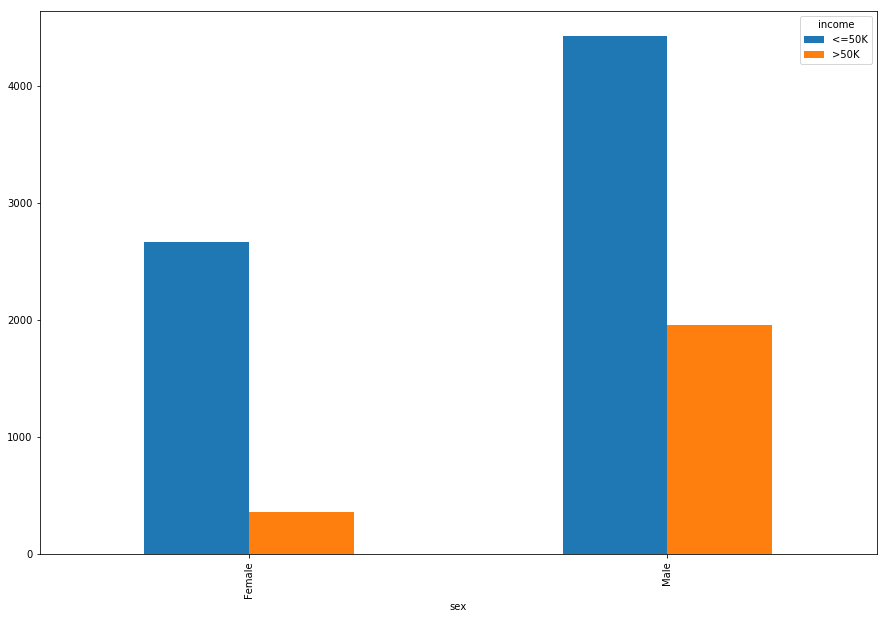

In [35]:
#sex vs income
ct_sex_in=pd.crosstab(actable.sex,actable.income)
print(ct_sex_in)
ct_sex_in.plot(kind='bar',figsize=(15,10))
plt.show()

#The above analysis between sex and income, the male group dominate the most of 2/3 counts of data. Similar to the above, the count of low-income group (<=50k) is much much more than the high-income group. Although the male group dominates the overall count, the contrast on the Female group is much larger. The low-income group is about 6 times more than the high-income group in the Female group. On the contrary, the low-income group is ONLY double of the high-income group within the male group. This is always a major topic in the society, the male group always being said dominate the high-paying job or position. Sot that I would say that further research is necessary.

#3b)Predictive Modeling and Model Evaluation:

#Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [24]:
#Convert to Standard Spreadsheet format (get Dummies)
actable_dummies=pd.get_dummies(actable[['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income']])
actable_dummies.shape

(9412, 17)

In [25]:
actable_dummies.head(5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [26]:
#Drop out all the 'income_<=50K' column
actable_dummies_50=actable_dummies.drop('income_<=50K',axis=1)
actable_dummies_50.shape

(9412, 16)

In [27]:
actable_dummies_50.head(5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,0


In [28]:
#Extract the Class / target column from the main table
actable_target=actable_dummies_50['income_>50K']
actable_target.shape

(9412,)

#3b)Predictive Modeling and Model Evaluation:

#Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [29]:
#Drop the target column'income_>50K' from the table
actable_dummies_50.drop('income_>50K',axis=1,inplace=True)
actable_dummies_50.shape

(9412, 15)

In [30]:
actable_dummies_50.head(5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [31]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
actable_train,actable_test,actable_target_train,actable_target_test=train_test_split(actable_dummies_50,
                                                                         actable_target,
                                                                         test_size=0.2,
                                                                         random_state=10)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
actable_train.shape

(7529, 15)

In [33]:
actable_target_train.shape

(7529,)

In [34]:
actable_test.shape

(1883, 15)

In [35]:
actable_target_test.shape

(1883,)

In [36]:
from sklearn import neighbors, tree, naive_bayes

#Navie Bayes (Gaussian)

In [37]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(actable_train, actable_target_train)
print ("Score on Training: ", nbclf.score(actable_train, actable_target_train))
print ("Score on Test: ", nbclf.score(actable_test, actable_target_test))

Score on Training:  0.723734891752
Score on Test:  0.698353690919


In [38]:
#10-fold Cross Validation
from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(nbclf, actable_dummies_50, actable_target, cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

Overall Average accuracy: 0.717805 +/- 0.011479


#Decision Tree using 'entropy'

In [39]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
treeclf = treeclf.fit(actable_train, actable_target_train)
print('Training Score : ',treeclf.score(actable_train, actable_target_train))
print('Testing Score : ',treeclf.score(actable_test, actable_target_test))

Training Score :  0.944481338823
Testing Score :  0.761550716941


In [40]:
#10-fold Cross-Validation 
cv_scores = cross_validation.cross_val_score(treeclf, actable_dummies_50, actable_target, cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

Overall Average accuracy: 0.764981 +/- 0.013119


#Linear Discriminant Analysis (LDA)

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(actable_train, actable_target_train)
print ("Score on Training: ", ldclf.score(actable_train, actable_target_train))
print ("Score on Test: ", ldclf.score(actable_test, actable_target_test))

Score on Training:  0.807278523044
Score on Test:  0.808815719596


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [43]:
#10-fold Cross-Validation
cv_scores = cross_validation.cross_val_score(ldclf, actable_dummies_50, actable_target, cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

Overall Average accuracy: 0.807588 +/- 0.010092


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warn

In [49]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='dtree.dot', feature_names=actable_train.columns)

In [46]:
import graphviz
from graphviz import Source

with open("dtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [52]:
from os import system
system('dot -Tpng dtree.dot -o dtree.png')

0

In [53]:
from IPython.display import Image
Image(filename='dtree.png', width=800)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#Based on the above proceed result, the figue is exceed the browser limit, so that it is unable to display. The Tree.dot file was able to be genertated. However, the generated png is also unable to show the clear tree diagram. 